# Exploratory Data Analysis of Wine Dataset

## Load and Inspect the Data

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'preprocessed_winemag-data.csv'  
data = pd.read_csv(file_path)

data.head()


c:\Users\zerra\.conda\envs\ml\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,id,country,description,designation,points,price,province,title,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
4,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo


## Data Description

In [5]:
data.describe()

,id,points,price
count,86148.000000,86148.000000,86148.000000
mean,65008.434729,88.729907,37.556403
std,37531.085008,3.051980,36.390439
min,1.000000,80.000000,4.000000
25%,32448.500000,87.000000,18.000000
50%,65192.500000,89.000000,28.000000
75%,97470.500000,91.000000,45.000000
max,129970.000000,100.000000,2013.000000


## Missing Values Check

In [6]:
data.isnull().sum()

id             0
country        0
description    0
designation    0
points         0
price          0
province       0
title          0
variety        0
winery         0
dtype: int64

## Distribution of Wine Scores

c:\Users\zerra\.conda\envs\ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


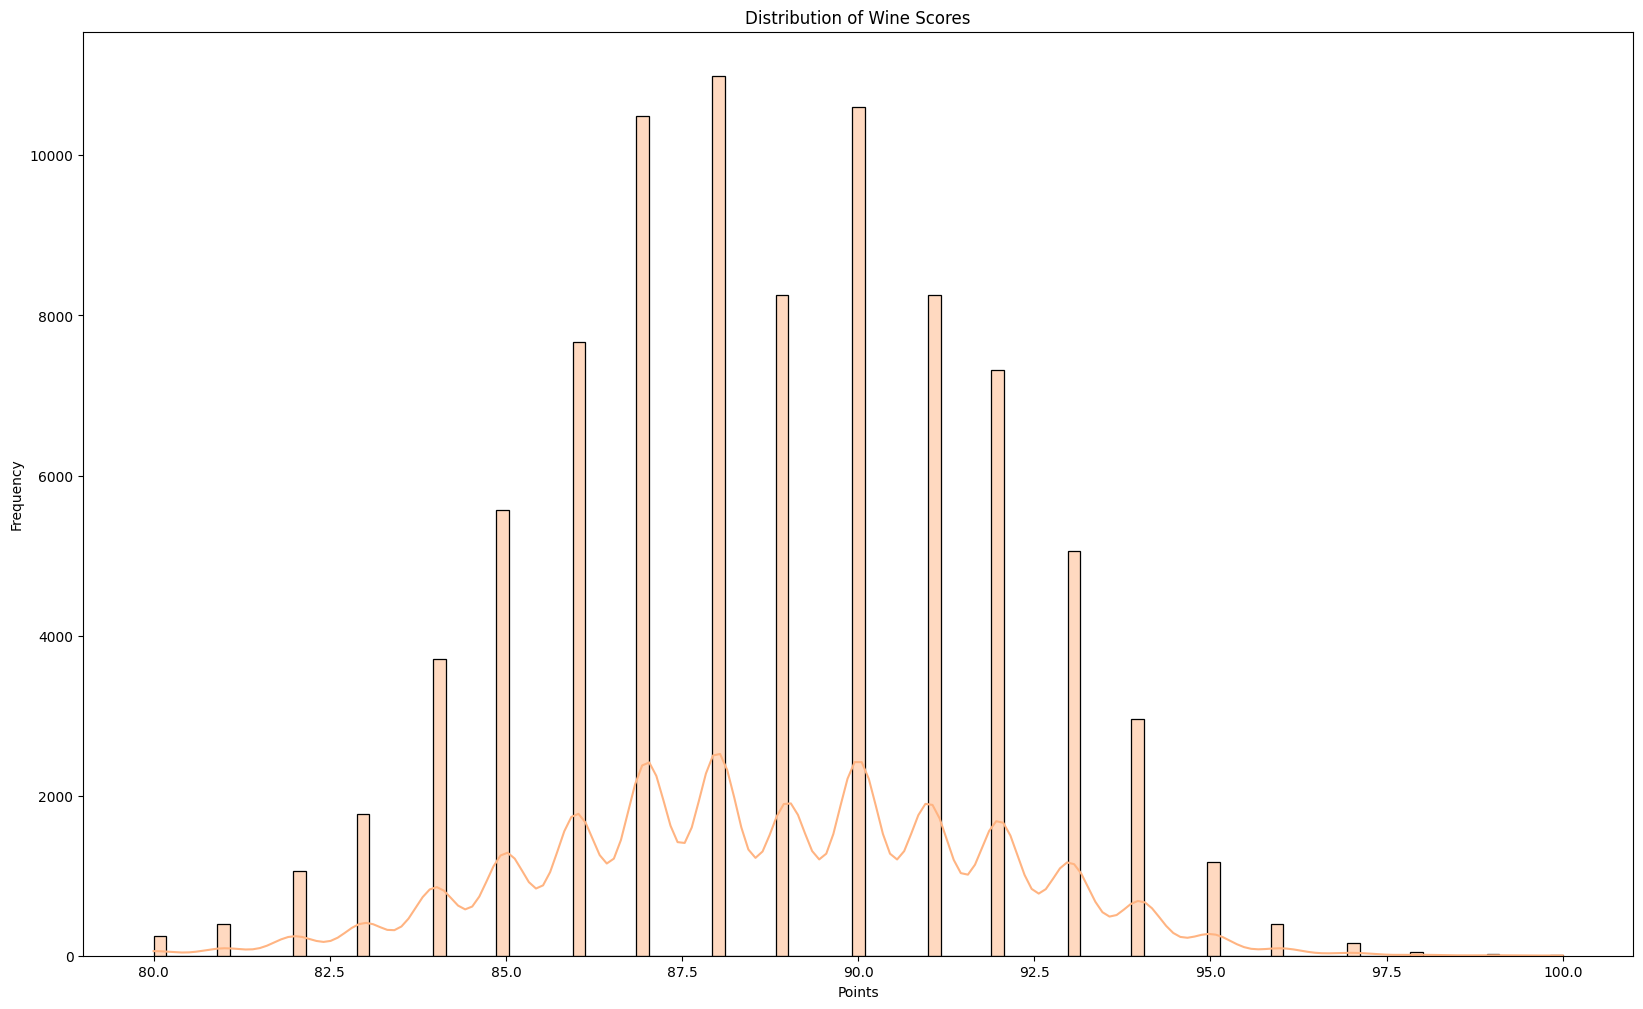

In [54]:


colors = sns.color_palette('pastel')[0:10]

plt.figure(figsize=(20, 12))
sns.histplot(data['points'], kde=True, color=colors[1])
plt.title('Distribution of Wine Scores')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()


## Distribution of Wine Prices

C:\Users\zerra\AppData\Local\Temp\ipykernel_42264\1513452262.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['price'].dropna(), bins=50, kde=True, palette="viridis", color=colors[2])
c:\Users\zerra\.conda\envs\ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


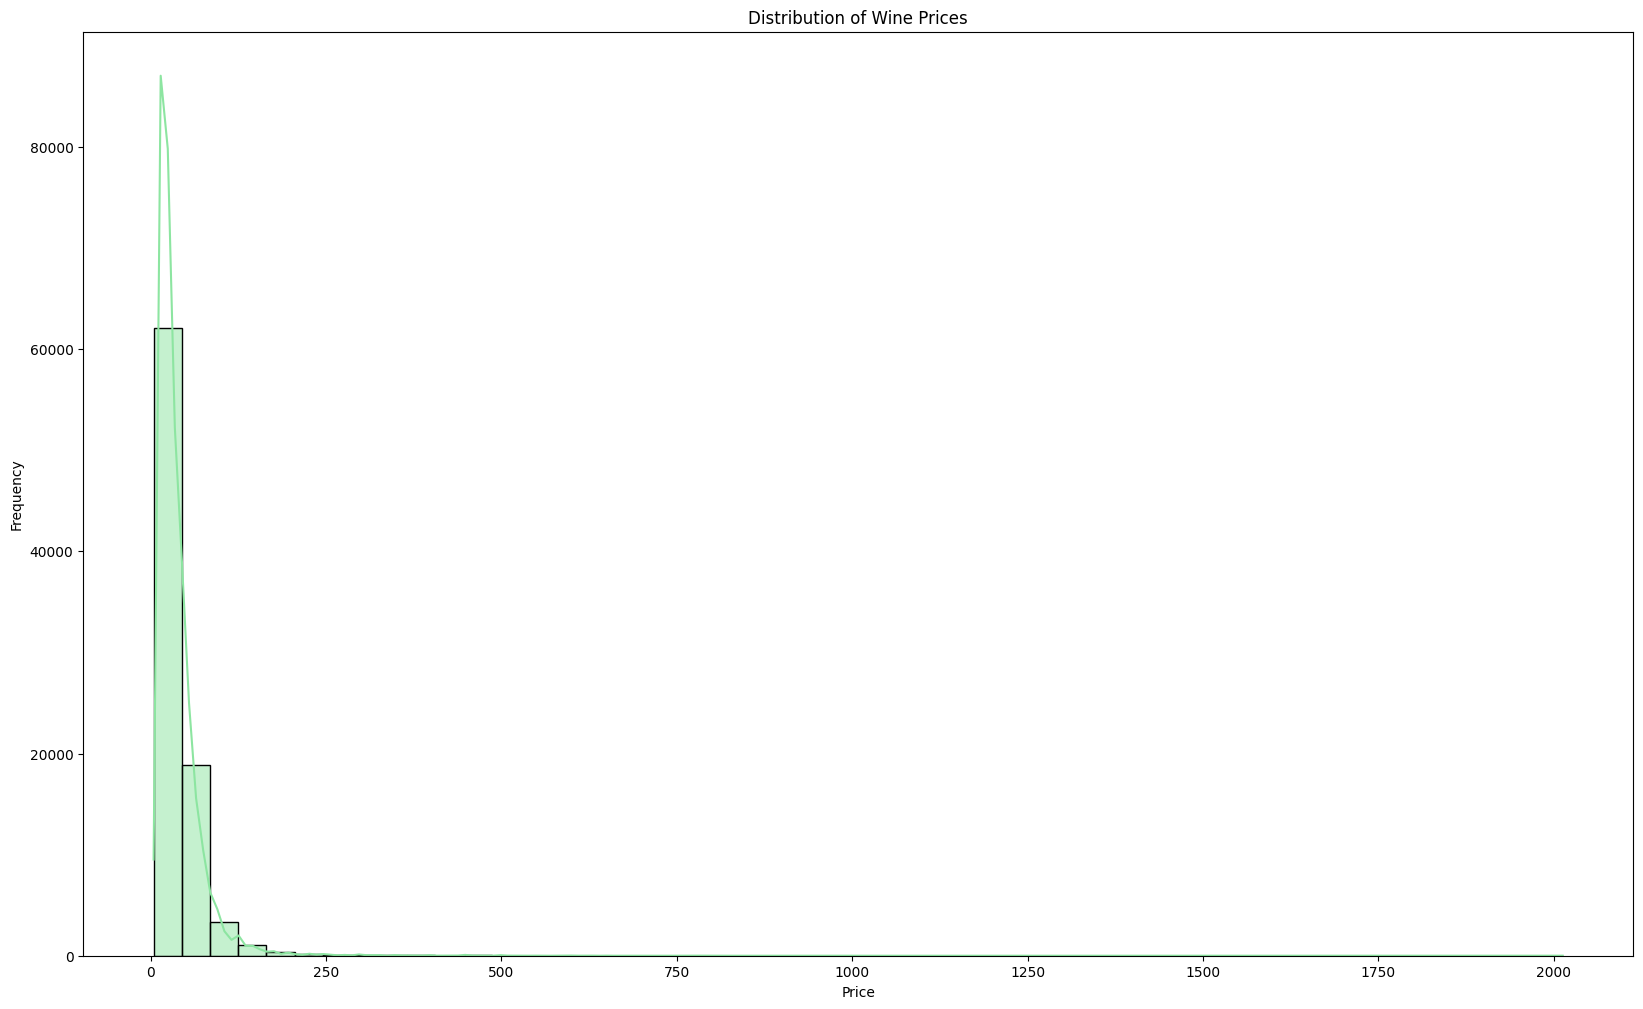

In [66]:

plt.figure(figsize=(20, 12))
sns.histplot(data['price'].dropna(), bins=50, kde=True, palette="viridis", color=colors[2])

plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


## Relationship between Price and Points

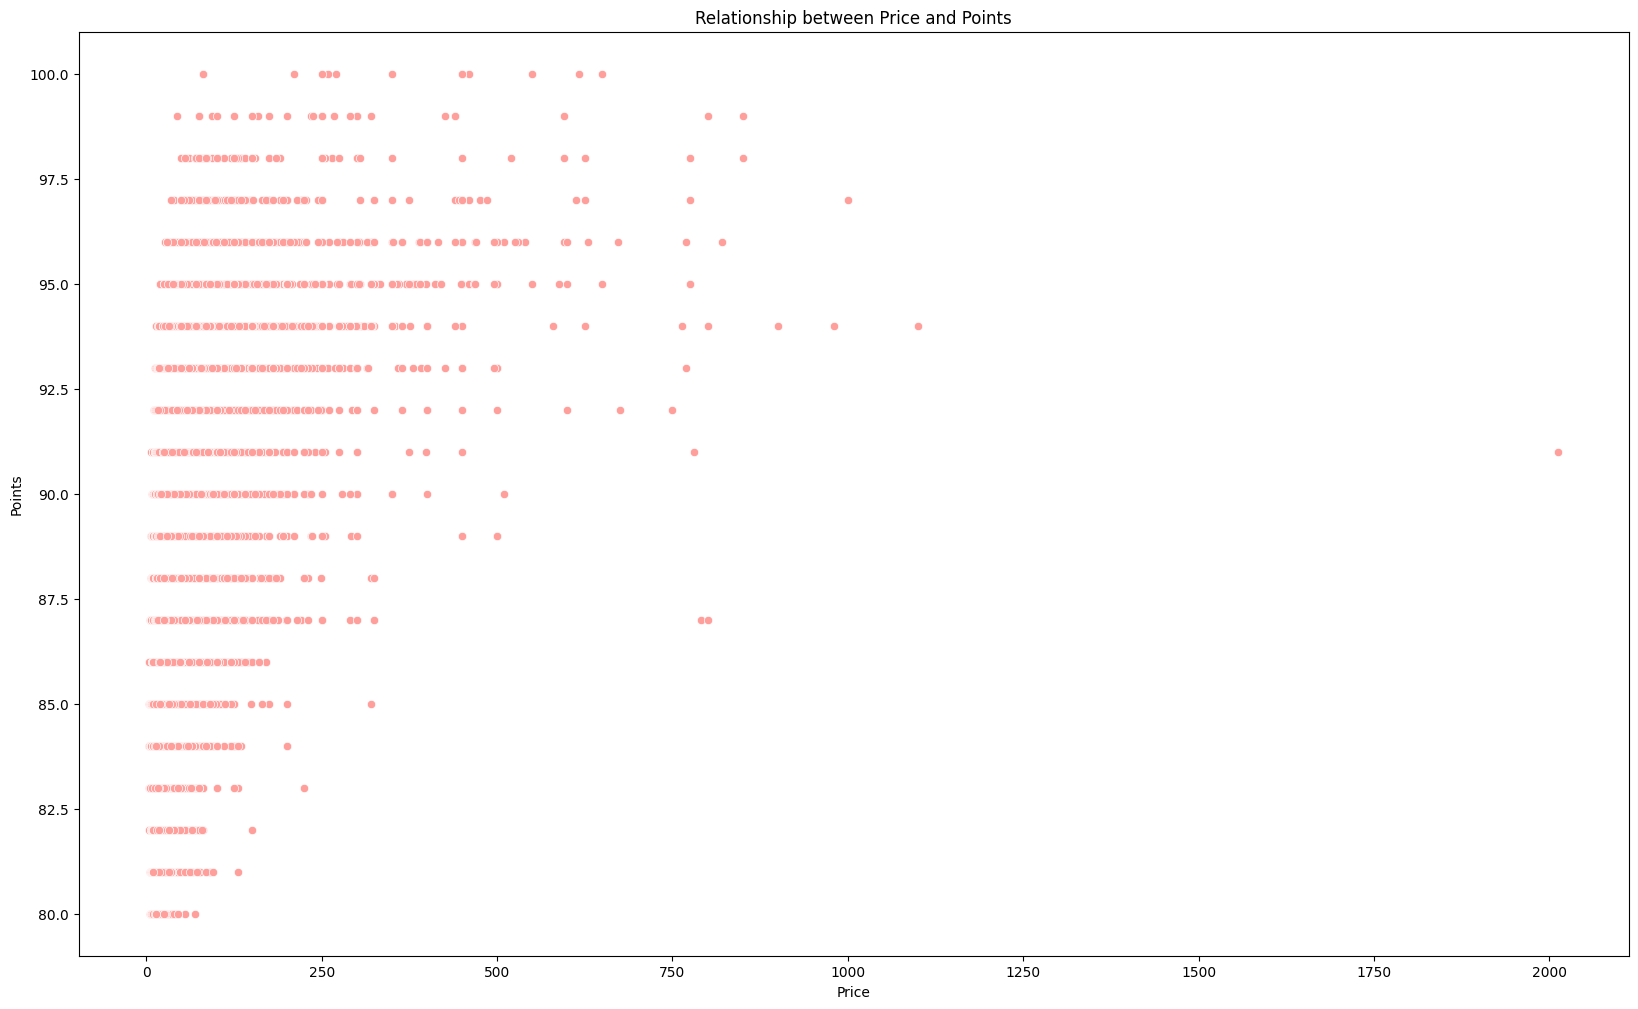

In [67]:

plt.figure(figsize=(20, 12))
sns.scatterplot(x='price', y='points', data=data, color=colors[3])
plt.title('Relationship between Price and Points')
plt.xlabel('Price')
plt.ylabel('Points')
plt.show()


## Distribution of Wines by Country

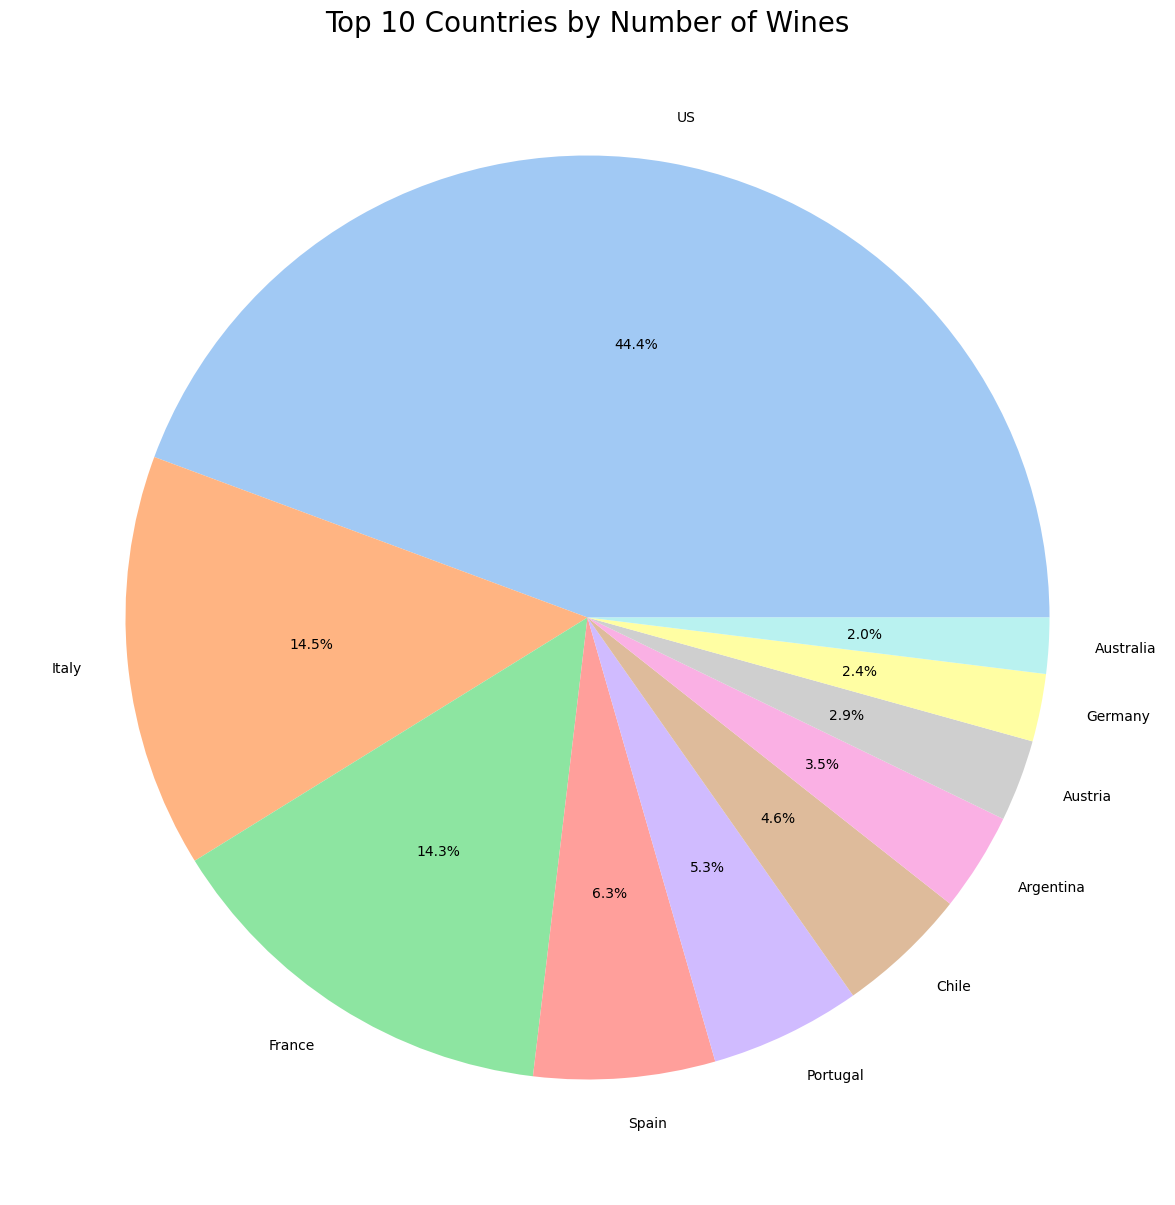

In [80]:

country_counts = data['country'].value_counts()


plt.figure(figsize=(20, 15))
plt.pie(country_counts[:10], labels=country_counts[:10].index, colors=colors, autopct='%1.1f%%')
plt.title('Top 10 Countries by Number of Wines', fontsize=20)
plt.show()

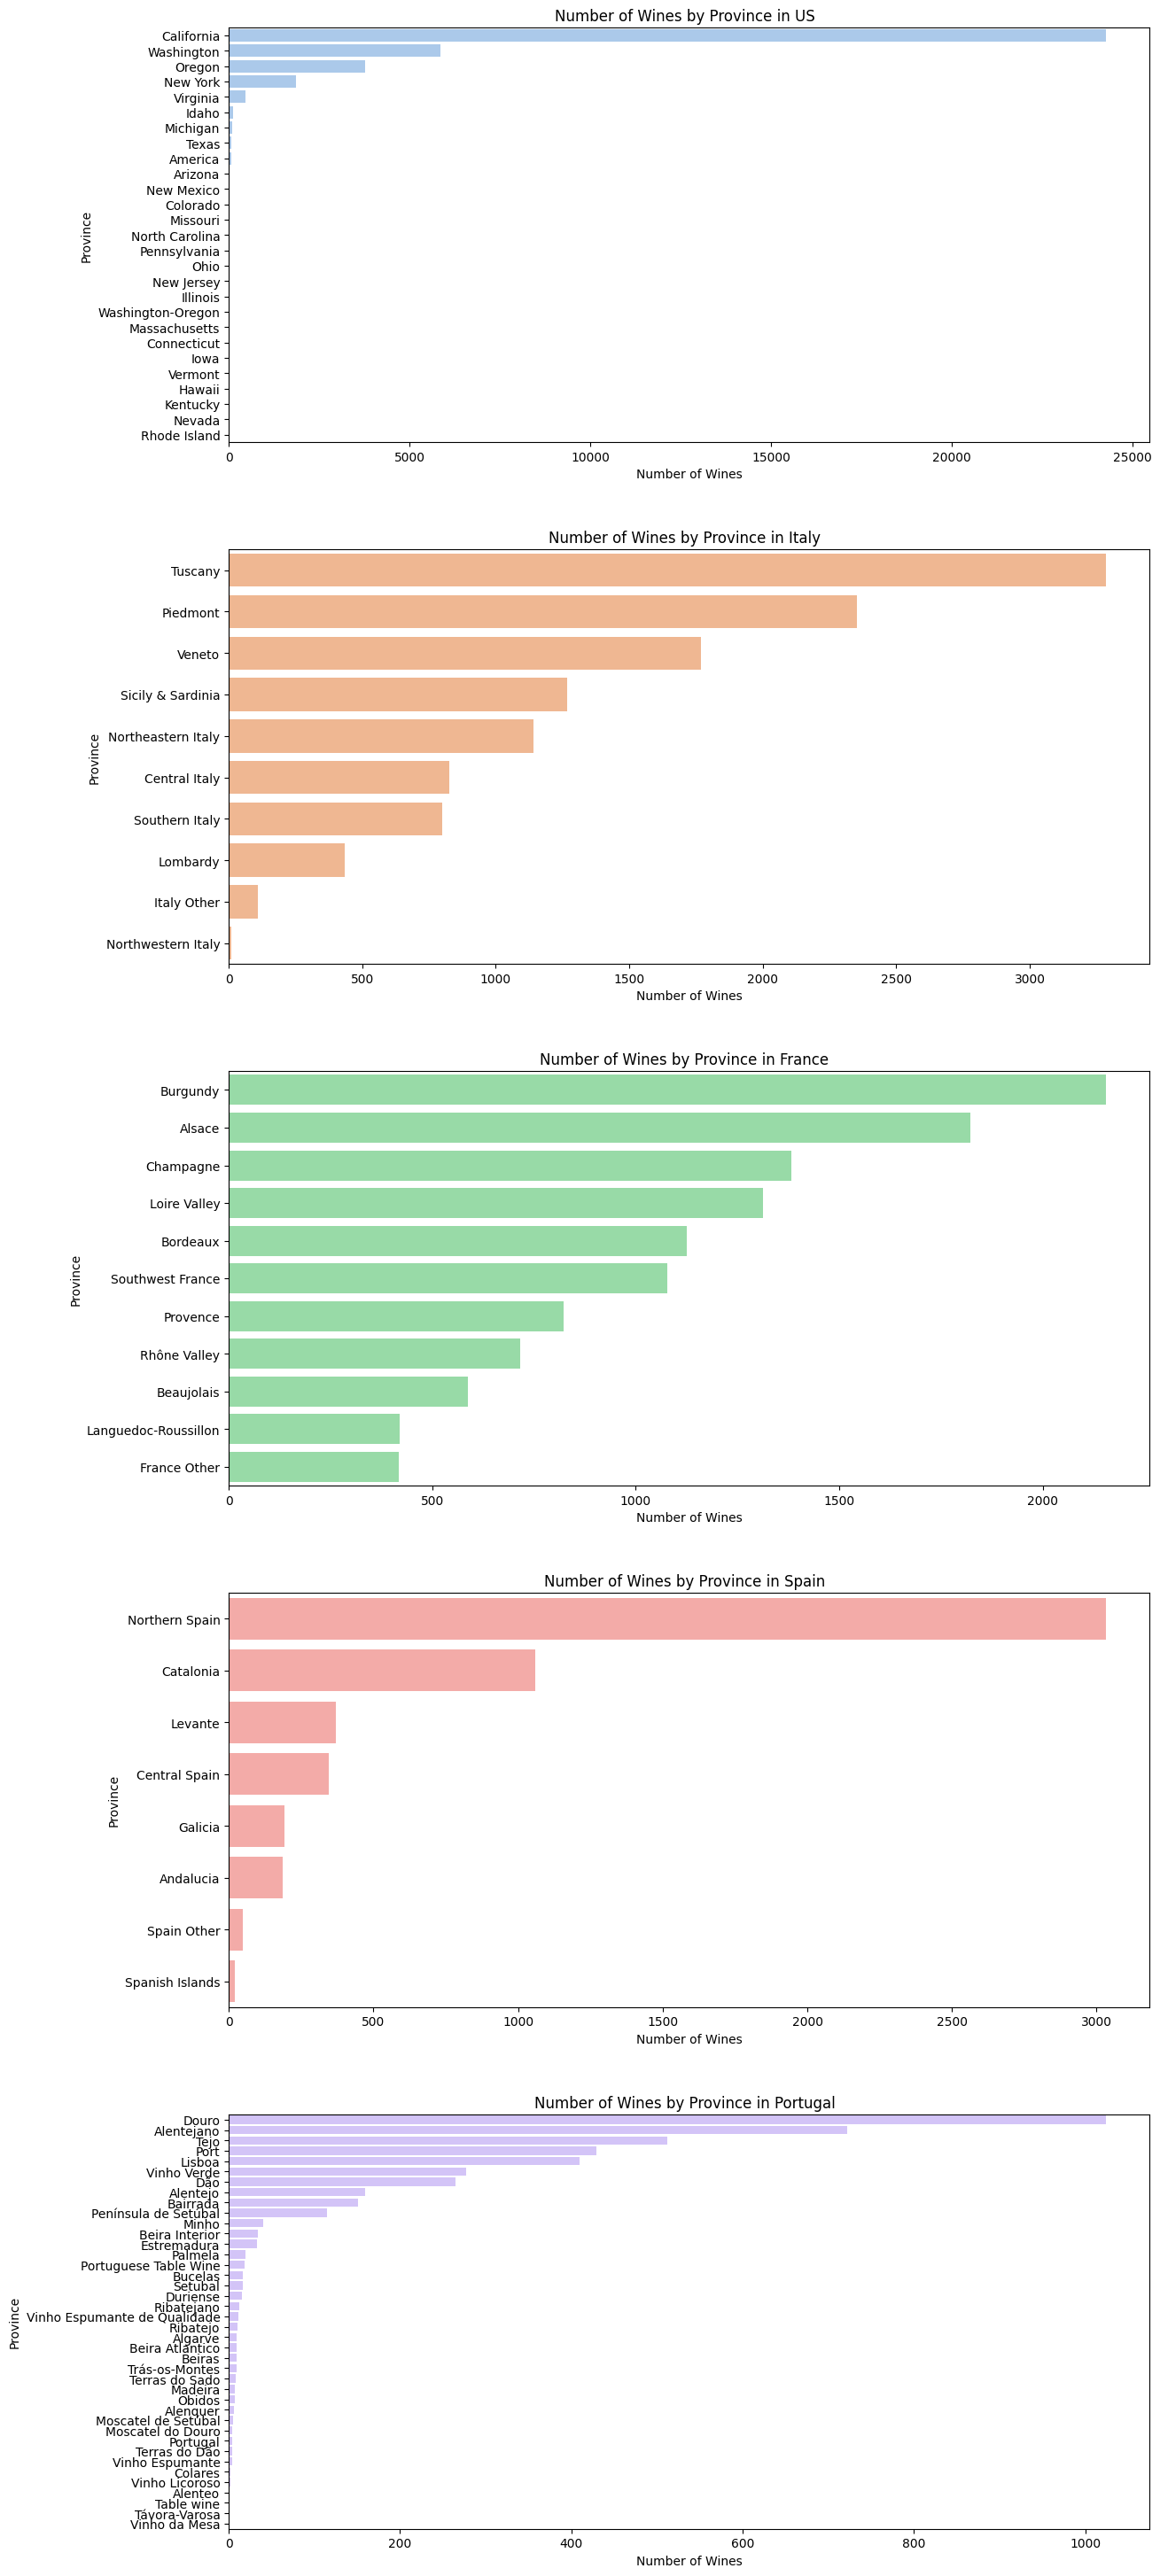

In [81]:
top_countries_by_wine_count = country_counts[:5].index

province_counts = data.groupby(['country', 'province']).size().reset_index(name='counts')

top_countries_provinces = province_counts[province_counts['country'].isin(top_countries_by_wine_count)]
top_countries_provinces = top_countries_provinces.sort_values(['country', 'counts'], ascending=[True, False])

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 30))

for i, country in enumerate(top_countries_by_wine_count):
    country_data = top_countries_provinces[top_countries_provinces['country'] == country]
    sns.barplot(x='counts', y='province', data=country_data, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Number of Wines by Province in {country}  ')
    axes[i].set_xlabel('Number of Wines')
    axes[i].set_ylabel('Province')

fig.tight_layout(pad=4.0)  
plt.show()

# Wine year distribution

c:\Users\zerra\.conda\envs\ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


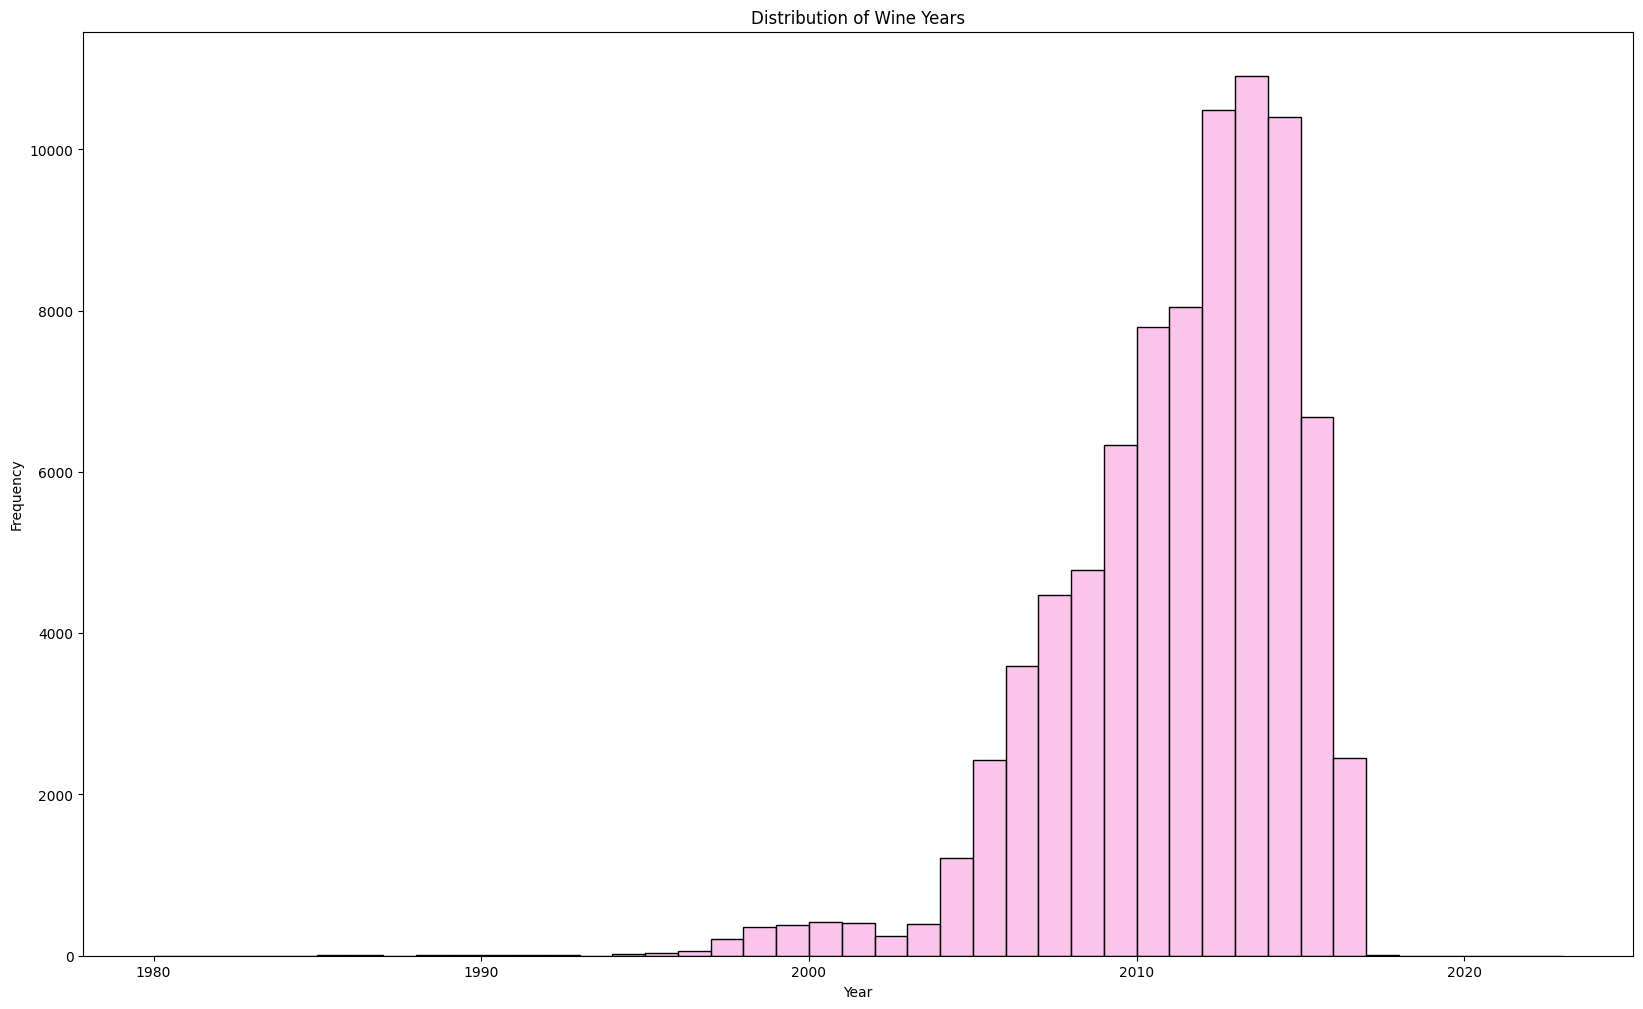

In [74]:
import re

# We need to ensure the regular expression captures four consecutive digits that likely represent a year
data['year'] = data['title'].apply(lambda x: re.findall(r'\b\d{4}\b', x))

# The result can be a list of years; we assume the first one is the wine year and convert it to an integer
data['year'] = data['year'].apply(lambda x: int(x[0]) if x else None)

# Plotting the histogram with the extracted years, ensuring they are plausible wine production years
valid_years = data[(data['year'] >= 1900) & (data['year'] <= 2023)]['year']

plt.figure(figsize=(20, 12))
sns.histplot(valid_years.dropna(), bins=range(1980, 2024), color=colors[6])  # Bins from 1900 to 2023
plt.title('Distribution of Wine Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()



# Varieties

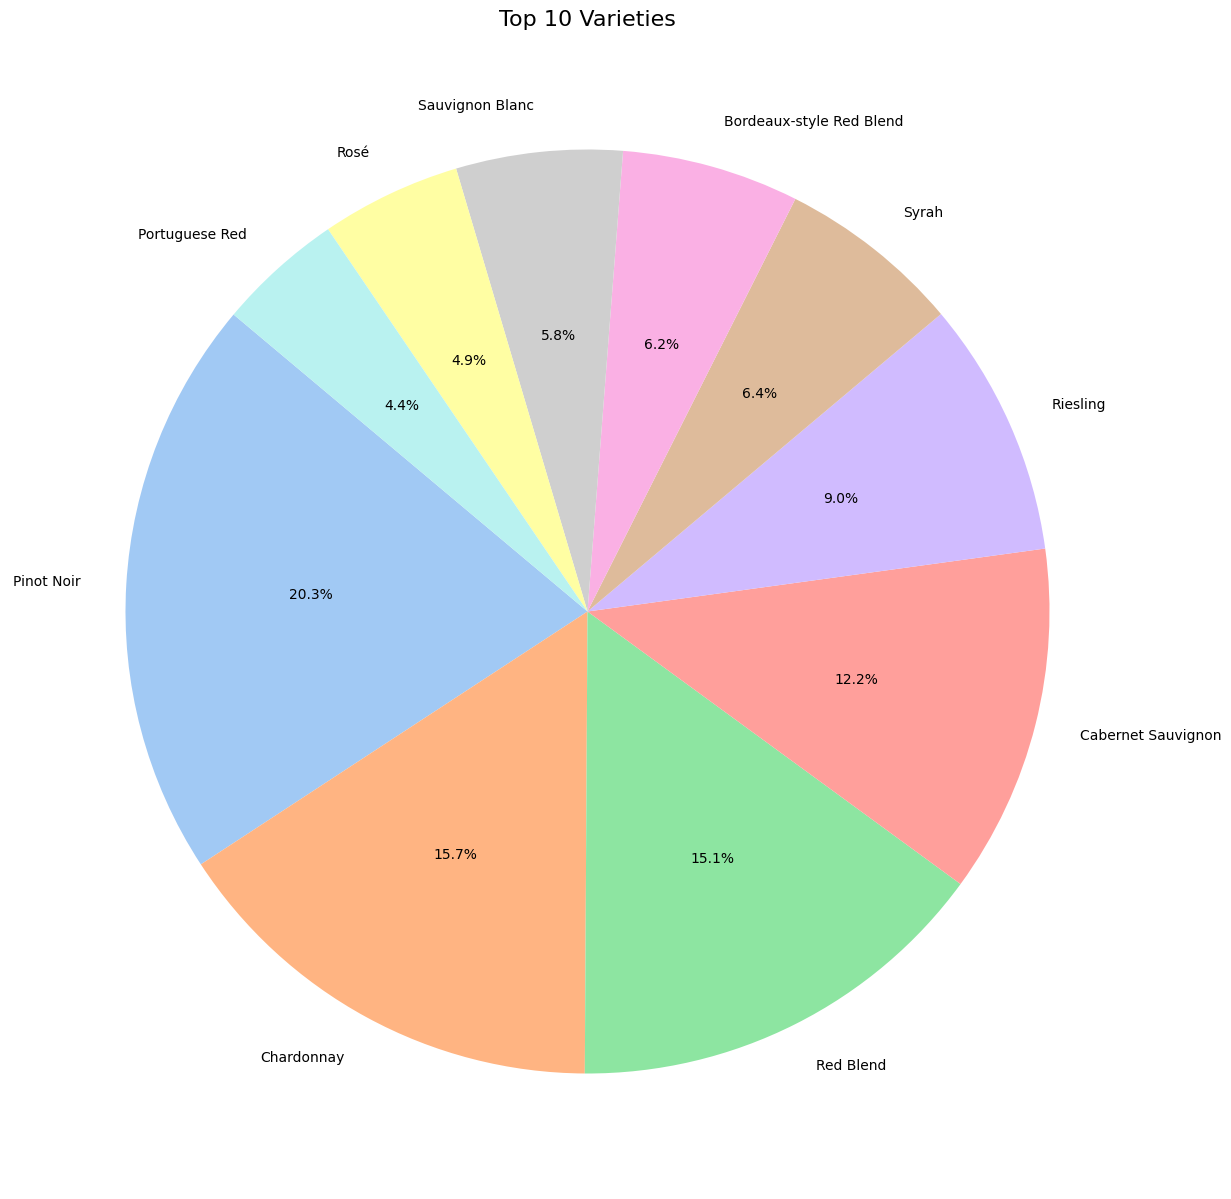

In [79]:
top_varieties = data['variety'].value_counts().head(10)

plt.figure(figsize=(15, 15))
plt.pie(top_varieties, labels=top_varieties.index, autopct='%1.1f%%', colors=colors, startangle=140 )
plt.title('Top 10 Varieties', fontsize=16)
plt.show()
